In [1]:
#Nikhil Kagalwala
#Nick Project

In [2]:
# Test change for github
# balls

In [270]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
from datetime import date
from calendar import monthrange
import math

%matplotlib inline

In [4]:
df = pd.read_csv("September 2021 Count Report.csv")

In [288]:
days_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [59]:
#get month and year from csv
date_arr = (df["Date"][0]).split("/")
year = int(date_arr[2][:4])
month = int(date_arr[0])
#get (first day of month, num of days in month)
monthData = monthrange(year,month)
print(monthData)

#create 2D array for each day of the week (starting with monday), initialize it
# [i,j] = day of the week -> all dates of month that are on this day
# [0,0] = sep_6 (first monday of the month)

daysOfWeekData = [None, None, None, None, None, None, None]
for i in range(1, monthData[1] + 1):
    strDate = str(month) + "/" + str(i) + "/" + str(year) + " 0:00"
    data = df[df["Date"] == strDate]
    index = ((i + monthData[0]) % 7) - 1
    #define each first day of day of week
    if (i < 8):
        if (index == -1):
            index = 6
        daysOfWeekData[index] = [data]
    else:
        if (index == -1):
            index = 6
        daysOfWeekData[index].extend([data])
        
pd.DataFrame(daysOfWeekData[0][0])

(2, 30)


In [289]:
class Room:
    def __init__(self, name, max_capacity):
        self.name = name
        self.max_capacity = max_capacity
    
    def display_graph(self, day):
        times = ["6:00 AM", "7:00 AM", "8:00 AM", "9:00 AM", "10:00 AM", "11:00 AM",
         "12:00 PM", "1:00 PM", "2:00 PM", "3:00 PM", "4:00 PM", "5:00 PM",
         "6:00 PM", "7:00 PM", "8:00 PM", "9:00 PM", "10:00 PM", "11:00 PM"]
        counts = [0.0] * 18
        sums = [0.0] * 18
        avgs = [0.0] * 18
        day_data = daysOfWeekData[days_week.index(day)]        

        for days in day_data:
            curr_ind = -1
            curr_ind = days.index[days["Location"] == self.name].tolist()[0]
            if (curr_ind != -1):                
                for i in range(len(times)):
                    if (str(df.iloc[curr_ind][times[i]]) != "nan"):
                        sums[i] += float(df.iloc[curr_ind][times[i]])
                        counts[i] += 1
        
        
        for i in range(len(counts)):
            # we have to stop this calculation if counts[i] = 0 and somehow show that there is not enough data for this graph
            avgs[i] = math.ceil(sums[i] / counts[i])
                    
        plt.bar(times, avgs, color="#0479a8")
        plt.ylabel('Count', fontsize=14)
        plt.xlabel('Time', fontsize=14)
        plt.xticks(rotation=90)
        title = self.name + "\n" + day + " Usage"
        plt.title(title, fontsize=14)
        plt.show()


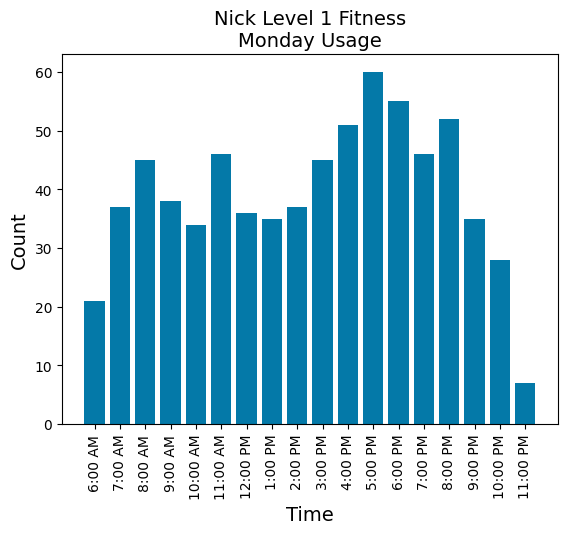

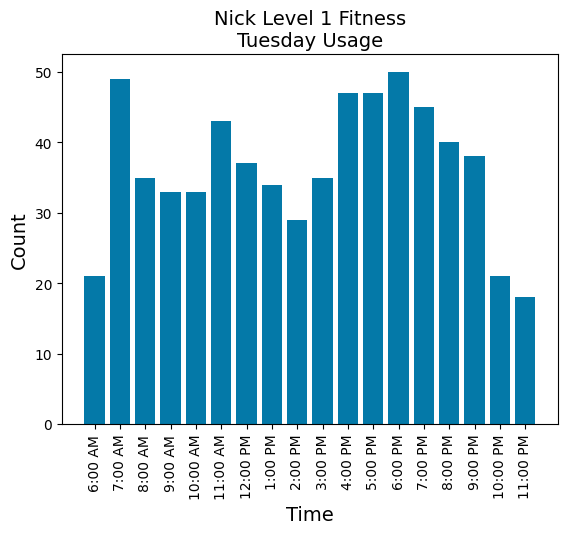

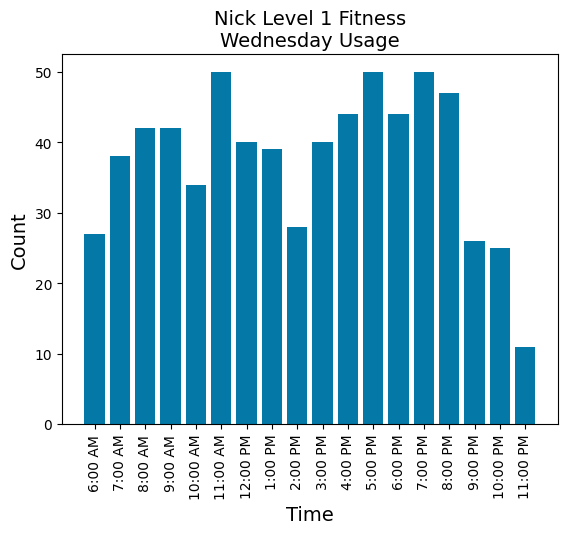

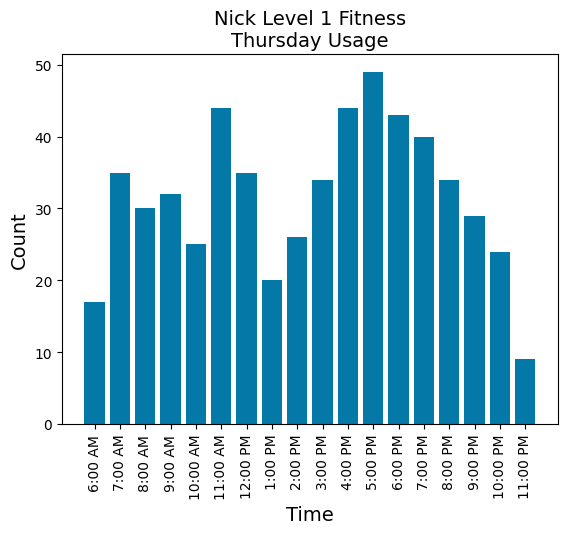

ZeroDivisionError: float division by zero

In [290]:
lvl_1_fitness = Room("Nick Level 1 Fitness", 150)

for day in days_week:
    lvl_1_fitness.display_graph(day)